In [5]:
import pandas as pd
import numpy as np

# Read the sample data
data = pd.read_csv("/content/cancer patient data sets.csv")

# Choose two classes (e.g., 'Low' and 'Medium')
class1 = data[data['Level'] == 'Low']
class2 = data[data['Level'] == 'Medium']

# Calculate mean (centroid) for each class
centroid1 = np.mean(class1.iloc[:, 2:-1], axis=0)  # Assuming columns 2 onwards are features
centroid2 = np.mean(class2.iloc[:, 2:-1], axis=0)

# Calculate spread (standard deviation) for each class
spread1 = np.std(class1.iloc[:, 2:-1], axis=0)
spread2 = np.std(class2.iloc[:, 2:-1], axis=0)

# Calculate distance between mean vectors of the two classes
distance_between_centroids = np.linalg.norm(centroid1 - centroid2)

# Print results
print("Mean (Centroid) of Class 'Low':", centroid1)
print("Spread (Standard Deviation) of Class 'Low':", spread1)
print("\nMean (Centroid) of Class 'Medium':", centroid2)
print("Spread (Standard Deviation) of Class 'Medium':", spread2)
print("\nDistance between centroids of 'Low' and 'Medium' classes:", distance_between_centroids)


Mean (Centroid) of Class 'Low': Age                     35.412541
Gender                   1.508251
Air Pollution            2.600660
Alcohol_use              2.231023
Dust Allergy             3.112211
Genetic Risk             2.732673
chronic Lung Disease     3.092409
Smoking                  3.023102
Chest Pain               2.834983
Coughing of Blood        2.861386
Shortness of Breath      2.498350
Wheezing                 2.574257
Frequent Cold            2.366337
Dry Cough                2.914191
dtype: float64
Spread (Standard Deviation) of Class 'Low': Age                     12.106708
Gender                   0.499932
Air Pollution            1.109039
Alcohol_use              1.258409
Dust Allergy             1.657252
Genetic Risk             1.429702
chronic Lung Disease     1.693915
Smoking                  1.775185
Chest Pain               1.820083
Coughing of Blood        1.684895
Shortness of Breath      1.448510
Wheezing                 1.024581
Frequent Cold            

2


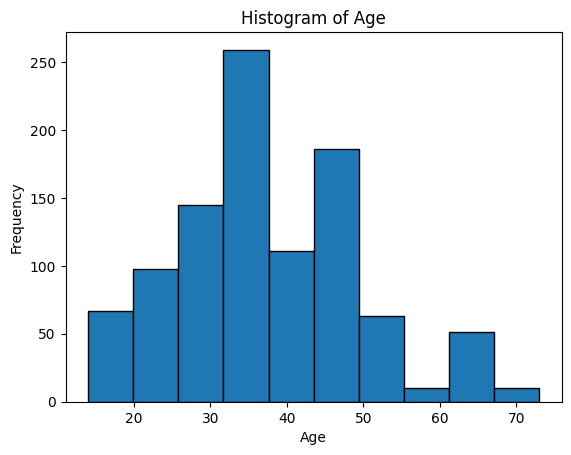

Mean Age: 37.174
Variance of Age: 143.987724


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the sample data
data = pd.read_csv("/content/cancer patient data sets.csv")

# Choose the feature for analysis (e.g., 'Age')
feature_data = data['Age']

# Plot histogram
plt.hist(feature_data, bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Calculate mean and variance
mean_age = np.mean(feature_data)
variance_age = np.var(feature_data)

# Print results
print("Mean Age:", mean_age)
print("Variance of Age:", variance_age)



3


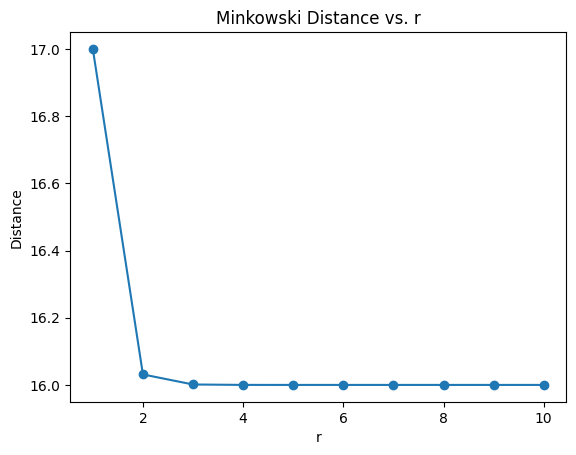

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the sample data
data = pd.read_csv("/content/cancer patient data sets.csv")

# Choose two feature vectors for Minkowski distance calculation
feature_vector1 = data[['Age', 'Air Pollution']].iloc[0].values
feature_vector2 = data[['Age', 'Air Pollution']].iloc[1].values

# Calculate Minkowski distance for r from 1 to 10
r_values = range(1, 11)
distances = [np.linalg.norm(feature_vector1 - feature_vector2, ord=r) for r in r_values]

# Plot the Minkowski distance
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.ylabel('Distance')
plt.show()


4


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
data_path = "/content/cancer patient data sets.csv"
data = pd.read_csv(data_path)

# Assuming 'Level' is the target variable
X = data.drop('Level', axis=1)  # Features
y = data['Level']  # Target class levels

# Choose any two classes from the dataset
class1 = 'Low'
class2 = 'Medium'

# Filter the data for the selected classes
selected_data = data[(data['Level'] == class1) | (data['Level'] == class2)]

# Split the dataset into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    selected_data.drop('Level', axis=1),
    selected_data['Level'],
    test_size=0.3,
    random_state=42
)

# Check the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (444, 16)
X_test shape: (191, 16)
y_train shape: (444,)
y_test shape: (191,)


5


In [13]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Load the dataset
data_path = "/content/cancer patient data sets.csv"
data = pd.read_csv(data_path)

# Assuming 'Level' is the target variable
X = data.drop('Level', axis=1)  # Features
y = data['Level']  # Target class levels

# Choose any two classes from the dataset
class1 = 'Low'
class2 = 'Medium'

# Filter the data for the selected classes
selected_data = data[(data['Level'] == class1) | (data['Level'] == class2)]

# Extract numerical features and labels
X_selected = selected_data.drop('Level', axis=1)
y_selected = selected_data['Level']

# One-hot encode categorical variables in features (X_selected)
X_selected_encoded = pd.get_dummies(X_selected)

# Split the dataset into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_encoded,
    y_selected,
    test_size=0.3,
    random_state=42
)

# Preprocess the target variable 'y_train' using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Train a kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train_encoded)

# Now the classifier is trained and ready for predictions
# Preprocess the target variable 'y_test' using LabelEncoder for making predictions
y_test_encoded = label_encoder.transform(y_test)

# Example: Make predictions on the test set
predictions = neigh.predict(X_test)

# Print the predictions
print("Predictions:", predictions)

# If needed, you can inverse transform the predictions to get the original class labels
original_predictions = label_encoder.inverse_transform(predictions)
print("Original Predictions:", original_predictions)



Predictions: [0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0
 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0
 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0
 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1
 0 1 0 0 1 1]
Original Predictions: ['Low' 'Low' 'Medium' 'Low' 'Medium' 'Medium' 'Low' 'Low' 'Medium' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Medium' 'Medium' 'Low' 'Medium'
 'Low' 'Low' 'Medium' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Low' 'Low'
 'Medium' 'Medium' 'Low' 'Medium' 'Low' 'Low' 'Medium' 'Medium' 'Medium'
 'Medium' 'Low' 'Low' 'Medium' 'Medium' 'Medium' 'Low' 'Medium' 'Low'
 'Medium' 'Medium' 'Medium' 'Medium' 'Low' 'Low' 'Low' 'Medium' 'Medium'
 'Low' 'Medium' 'Low' 'Medium' 'Medium' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Medium' 'Me

6


In [14]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Load the dataset
data_path = "/content/cancer patient data sets.csv"
data = pd.read_csv(data_path)

# Assuming 'Level' is the target variable
X = data.drop('Level', axis=1)  # Features
y = data['Level']  # Target class levels

# Choose any two classes from the dataset
class1 = 'Low'
class2 = 'Medium'

# Filter the data for the selected classes
selected_data = data[(data['Level'] == class1) | (data['Level'] == class2)]

# Extract numerical features and labels
X_selected = selected_data.drop('Level', axis=1)
y_selected = selected_data['Level']

# One-hot encode categorical variables in features (X_selected)
X_selected_encoded = pd.get_dummies(X_selected)

# Split the dataset into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_encoded,
    y_selected,
    test_size=0.3,
    random_state=42
)

# Preprocess the target variable 'y_train' using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Train a kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train_encoded)

# Now the classifier is trained and ready for predictions
# Preprocess the target variable 'y_test' using LabelEncoder for making predictions
y_test_encoded = label_encoder.transform(y_test)

# Example: Make predictions on the test set
predictions = neigh.predict(X_test)

# Print the predictions
print("Predictions:", predictions)

# If needed, you can inverse transform the predictions to get the original class labels
original_predictions = label_encoder.inverse_transform(predictions)
print("Original Predictions:", original_predictions)

# Example: Test the accuracy of the kNN classifier using the test set
accuracy = neigh.score(X_test, y_test_encoded)

# Print the accuracy
print("Accuracy:", accuracy)


Predictions: [0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0
 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0
 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0
 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1
 0 1 0 0 1 1]
Original Predictions: ['Low' 'Low' 'Medium' 'Low' 'Medium' 'Medium' 'Low' 'Low' 'Medium' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Medium' 'Medium' 'Low' 'Medium'
 'Low' 'Low' 'Medium' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Low' 'Low'
 'Medium' 'Medium' 'Low' 'Medium' 'Low' 'Low' 'Medium' 'Medium' 'Medium'
 'Medium' 'Low' 'Low' 'Medium' 'Medium' 'Medium' 'Low' 'Medium' 'Low'
 'Medium' 'Medium' 'Medium' 'Medium' 'Low' 'Low' 'Low' 'Medium' 'Medium'
 'Low' 'Medium' 'Low' 'Medium' 'Medium' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Medium' 'Me

7


In [15]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Load the dataset
data_path = "/content/cancer patient data sets.csv"
data = pd.read_csv(data_path)

# Assuming 'Level' is the target variable
X = data.drop('Level', axis=1)  # Features
y = data['Level']  # Target class levels

# Choose any two classes from the dataset
class1 = 'Low'
class2 = 'Medium'

# Filter the data for the selected classes
selected_data = data[(data['Level'] == class1) | (data['Level'] == class2)]

# Extract numerical features and labels
X_selected = selected_data.drop('Level', axis=1)
y_selected = selected_data['Level']

# One-hot encode categorical variables in features (X_selected)
X_selected_encoded = pd.get_dummies(X_selected)

# Split the dataset into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_encoded,
    y_selected,
    test_size=0.3,
    random_state=42
)

# Preprocess the target variable 'y_train' using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Train a kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train_encoded)

# Now the classifier is trained and ready for predictions
# Preprocess the target variable 'y_test' using LabelEncoder for making predictions
y_test_encoded = label_encoder.transform(y_test)

# Example: Make predictions on the test set
predictions = neigh.predict(X_test)

# Print the predictions
print("Predictions:", predictions)

# If needed, you can inverse transform the predictions to get the original class labels
original_predictions = label_encoder.inverse_transform(predictions)
print("Original Predictions:", original_predictions)

# Example: Test the accuracy of the kNN classifier using the test set
accuracy = neigh.score(X_test, y_test_encoded)
print("Accuracy:", accuracy)

# Example: Use the predict() function to study the prediction behavior for a specific test vector
# Choose any specific test vector (row) from the test set
test_vector_index = 0
test_vector = X_test.iloc[test_vector_index, :]

# Reshape the test vector to match the input format expected by predict()
reshaped_test_vector = test_vector.values.reshape(1, -1)

# Use the predict() function to classify the test vector
predicted_class = neigh.predict(reshaped_test_vector)

# Print the predicted class
print("Predicted Class for Test Vector:", predicted_class)


Predictions: [0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0
 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0
 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0
 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1
 0 1 0 0 1 1]
Original Predictions: ['Low' 'Low' 'Medium' 'Low' 'Medium' 'Medium' 'Low' 'Low' 'Medium' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Medium' 'Medium' 'Low' 'Medium'
 'Low' 'Low' 'Medium' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Low' 'Low'
 'Medium' 'Medium' 'Low' 'Medium' 'Low' 'Low' 'Medium' 'Medium' 'Medium'
 'Medium' 'Low' 'Low' 'Medium' 'Medium' 'Medium' 'Low' 'Medium' 'Low'
 'Medium' 'Medium' 'Medium' 'Medium' 'Low' 'Low' 'Low' 'Medium' 'Medium'
 'Low' 'Medium' 'Low' 'Medium' 'Medium' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Medium' 'Me

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


8


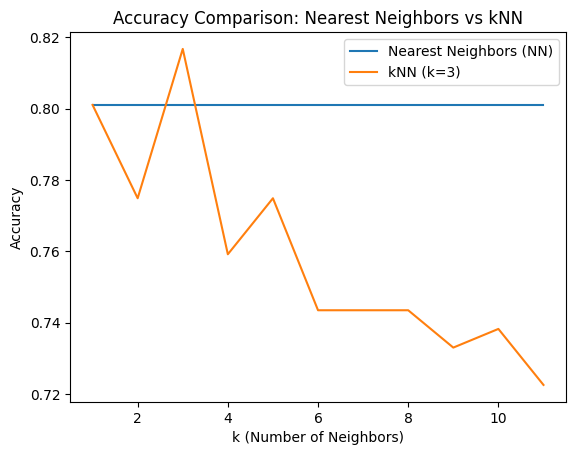

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset
data_path = "/content/cancer patient data sets.csv"
data = pd.read_csv(data_path)

# Assuming 'Level' is the target variable
X = data.drop('Level', axis=1)  # Features
y = data['Level']  # Target class levels

# Choose any two classes from the dataset
class1 = 'Low'
class2 = 'Medium'

# Filter the data for the selected classes
selected_data = data[(data['Level'] == class1) | (data['Level'] == class2)]

# Extract numerical features and labels
X_selected = selected_data.drop('Level', axis=1)
y_selected = selected_data['Level']

# One-hot encode categorical variables in features (X_selected)
X_selected_encoded = pd.get_dummies(X_selected)

# Split the dataset into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_encoded,
    y_selected,
    test_size=0.3,
    random_state=42
)

# Preprocess the target variable 'y_train' using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Vary k from 1 to 11
k_values = range(1, 12)
accuracy_scores_nn = []
accuracy_scores_knn = []

for k in k_values:
    # Train a Nearest Neighbors (NN) classifier with k
    nn_classifier = KNeighborsClassifier(n_neighbors=1)
    nn_classifier.fit(X_train, y_train_encoded)

    # Train a kNN classifier with k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train_encoded)

    # Test accuracy for Nearest Neighbors (NN)
    accuracy_nn = nn_classifier.score(X_test, label_encoder.transform(y_test))
    accuracy_scores_nn.append(accuracy_nn)

    # Test accuracy for kNN
    accuracy_knn = knn_classifier.score(X_test, label_encoder.transform(y_test))
    accuracy_scores_knn.append(accuracy_knn)

# Plotting the accuracy comparison
plt.plot(k_values, accuracy_scores_nn, label='Nearest Neighbors (NN)')
plt.plot(k_values, accuracy_scores_knn, label='kNN (k=3)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Nearest Neighbors vs kNN')
plt.legend()
plt.show()


9


K = 1, Train Accuracy: 1.0000, Test Accuracy: 0.8010
K = 2, Train Accuracy: 0.8874, Test Accuracy: 0.7749
K = 3, Train Accuracy: 0.9167, Test Accuracy: 0.8168
K = 4, Train Accuracy: 0.8626, Test Accuracy: 0.7592
K = 5, Train Accuracy: 0.8964, Test Accuracy: 0.7749
K = 6, Train Accuracy: 0.8671, Test Accuracy: 0.7435
K = 7, Train Accuracy: 0.8716, Test Accuracy: 0.7435
K = 8, Train Accuracy: 0.8401, Test Accuracy: 0.7435
K = 9, Train Accuracy: 0.8378, Test Accuracy: 0.7330
K = 10, Train Accuracy: 0.8086, Test Accuracy: 0.7382
K = 11, Train Accuracy: 0.8198, Test Accuracy: 0.7225


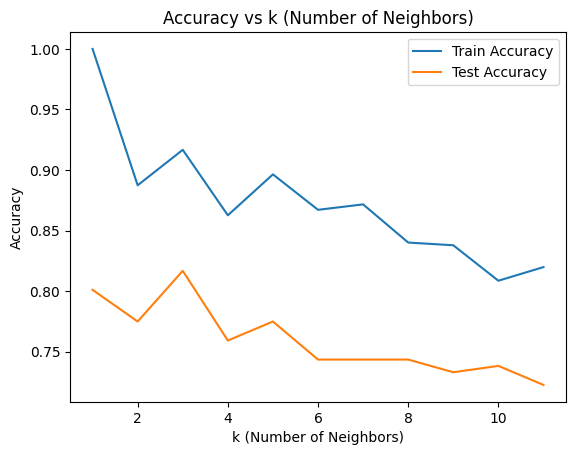

The best k based on test accuracy is: 3
Confusion Matrix (Test Data):
 [[79 17]
 [18 77]]
Precision (Test Data): 0.8191489361702128
Recall (Test Data): 0.8105263157894737
F1-Score (Test Data): 0.8148148148148148


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Load the dataset
data_path = "/content/cancer patient data sets.csv"
data = pd.read_csv(data_path)

# Assuming 'Level' is the target variable
X = data.drop('Level', axis=1)  # Features
y = data['Level']  # Target class levels

# Choose any two classes from the dataset
class1 = 'Low'
class2 = 'Medium'

# Filter the data for the selected classes
selected_data = data[(data['Level'] == class1) | (data['Level'] == class2)]

# Extract numerical features and labels
X_selected = selected_data.drop('Level', axis=1)
y_selected = selected_data['Level']

# One-hot encode categorical variables in features (X_selected)
X_selected_encoded = pd.get_dummies(X_selected)

# Split the dataset into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_encoded,
    y_selected,
    test_size=0.3,
    random_state=42
)

# Preprocess the target variable 'y_train' using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Vary k from 1 to 11 and evaluate accuracy
k_values = range(1, 12)
train_accuracies = []
test_accuracies = []

for k in k_values:
    # Train a kNN classifier
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train_encoded)

    # Evaluate accuracy on training set
    train_accuracy = neigh.score(X_train, y_train_encoded)
    train_accuracies.append(train_accuracy)

    # Evaluate accuracy on test set
    test_accuracy = neigh.score(X_test, label_encoder.transform(y_test))
    test_accuracies.append(test_accuracy)

    # Print results
    print(f"K = {k}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot the accuracy results
plt.plot(k_values, train_accuracies, label='Train Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k (Number of Neighbors)')
plt.legend()
plt.show()

# Choose the best k based on test accuracy
best_k = k_values[np.argmax(test_accuracies)]
print(f"The best k based on test accuracy is: {best_k}")

# Train a kNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train, y_train_encoded)

# Make predictions on the test set
predictions_test = neigh.predict(X_test)

# Evaluate confusion matrix and performance metrics for test data
conf_matrix_test = confusion_matrix(label_encoder.transform(y_test), predictions_test)
precision_test = precision_score(label_encoder.transform(y_test), predictions_test)
recall_test = recall_score(label_encoder.transform(y_test), predictions_test)
f1_test = f1_score(label_encoder.transform(y_test), predictions_test)

# Print results for test data
print("Confusion Matrix (Test Data):\n", conf_matrix_test)
print("Precision (Test Data):", precision_test)
print("Recall (Test Data):", recall_test)
print("F1-Score (Test Data):", f1_test)
